# PCA through Singular Value Decomposition

In [1]:
import numpy as np

# Defined 3 points in 2D-space:
X = np.array([[2, 1, 0],
              [4, 3, 0]])

# Calculate the covariance matrix:
R = np.cov(X.T)

# Calculate the SVD decomposition and new basis vectors:
[U, D, V] = np.linalg.svd(R)  # call SVD decomposition
u1 = U[:, 0] # new basis vectors
u2 = U[:, 1]

# Calculate the coordinates in new orthonormal basis:
X_new_basis = np.dot(X, V)

# Calculate the approximation of the original from new basis
X_approx = np.dot(X_new_basis, np.dot(np.diag(D), U))

# Check that you got the original
print("Original matrix:")
print(X)
print("\nApproximated matrix:")
print(X_approx)
print("\nDifference:")
print(X - X_approx)

Original matrix:
[[2 1 0]
 [4 3 0]]

Approximated matrix:
[[4. 0. 4.]
 [8. 0. 8.]]

Difference:
[[-2.  1. -4.]
 [-4.  3. -8.]]


# PCA on Iris data

In [2]:
# Load Iris dataset as in the last PC lab:
from sklearn.datasets import load_iris

iris = load_iris()
iris.feature_names

print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[:])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


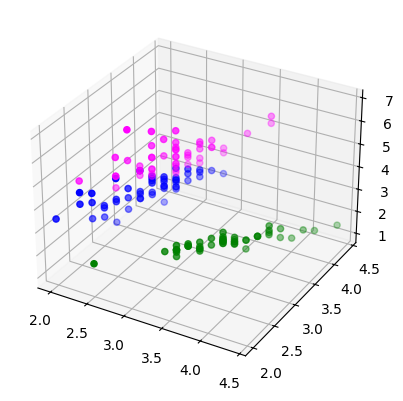

In [3]:
import matplotlib.pyplot as plt

# We have 4 dimensions of data, plot the first three colums in 3D
X = iris.data
y = iris.target

axes1 = plt.axes(projection='3d')
axes1.scatter3D(X[y==0,1],X[y==0,1],X[y==0,2],color='green')
axes1.scatter3D(X[y==1,1],X[y==1,1],X[y==1,2],color='blue')
axes1.scatter3D(X[y==2,1],X[y==2,1],X[y==2,2],color='magenta')
plt.show()

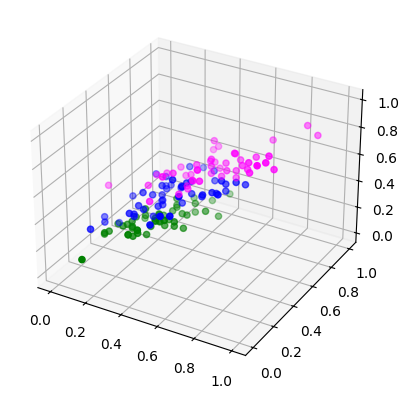

In [4]:
from sklearn import preprocessing, decomposition
from sklearn.preprocessing import MinMaxScaler

# Pre-processing is an important step, you can try either StandardScaler (zero mean, unit variance of features)
# or MinMaxScaler (to interval from 0 to 1)
Xscaler = MinMaxScaler()
Xpp = Xscaler.fit_transform(X)

# you can plot the transformed feature space in 3D:
axes2 = plt.axes(projection='3d')
axes2.scatter3D(Xpp[y==0,0],Xpp[y==0,1],Xpp[y==0,2],color='green')
axes2.scatter3D(Xpp[y==1,0],Xpp[y==1,1],Xpp[y==1,2],color='blue')
axes2.scatter3D(Xpp[y==2,0],Xpp[y==2,1],Xpp[y==2,2],color='magenta')
plt.show()

[[ 0.05290845 -0.00491134  0.05999602  0.05975355]
 [-0.00491134  0.03298254 -0.02328082 -0.02111795]
 [ 0.05999602 -0.02328082  0.08952249  0.09149784]
 [ 0.05975355 -0.02111795  0.09149784  0.10086914]]


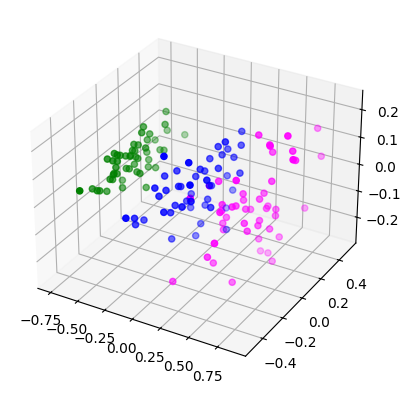

In [5]:
from sklearn import decomposition

pca=decomposition.PCA(n_components=3)
pca.fit(Xpp)
Xpca=pca.transform(Xpp)
print(pca.get_covariance())

axes2=plt.axes(projection='3d')
axes2.scatter3D(Xpca[y==0,0],Xpca[y==0,1],Xpca[y==0,2],color='green')
axes2.scatter3D(Xpca[y==1,0],Xpca[y==1,1],Xpca[y==1,2],color='blue')
axes2.scatter3D(Xpca[y==2,0],Xpca[y==2,1],Xpca[y==2,2],color='magenta')
plt.show()

In [6]:
# Compute pca.explained_variance_ and pca.explained_cariance_ratio_values
pca.explained_variance_

array([0.23245325, 0.0324682 , 0.00959685])

In [7]:
pca.explained_variance_ratio_

array([0.84136038, 0.11751808, 0.03473561])

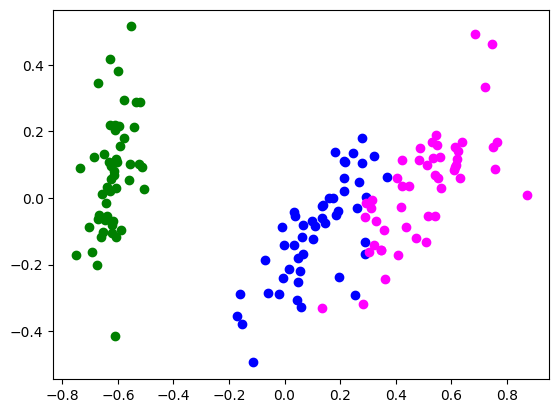

In [8]:
# Plot the principal components in 2D, mark different targets in color
plt.scatter(Xpca[y==0,0],Xpca[y==0,1],color='green')
plt.scatter(Xpca[y==1,0],Xpca[y==1,1],color='blue')
plt.scatter(Xpca[y==2,0],Xpca[y==2,1],color='magenta')
plt.show()

# KNN classifier

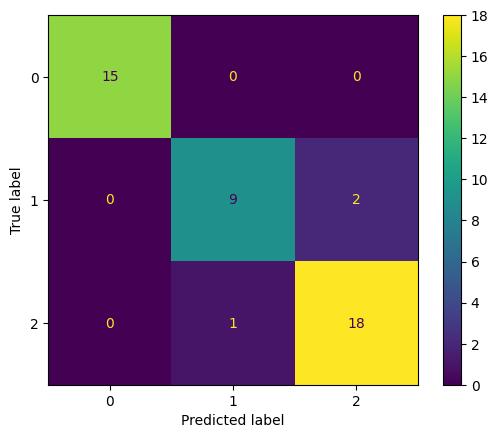

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# Import train_test_split as in last PC lab, split X (original) into train and test, train KNN classifier on full 4-dimensional X
X_train, X_test, y_train, y_test = train_test_split(Xpp, y, test_size=0.3)
knn1 = KNeighborsClassifier(n_neighbors=3)
knn1.fit(X_train, y_train)
Ypred = knn1.predict(X_test)

# Import and show confusion matrix
confusion_matrix(y_test, Ypred)
ConfusionMatrixDisplay.from_predictions(y_test, Ypred)

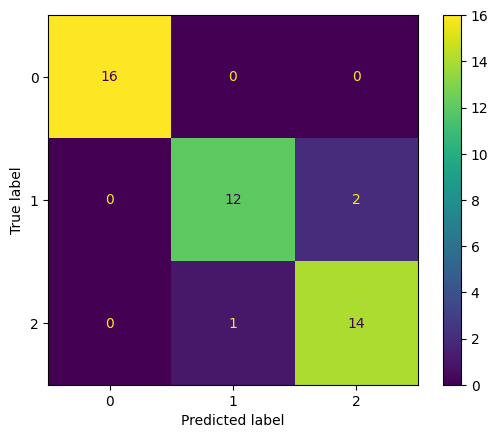

In [10]:
# Now do the same (data set split, KNN, confusion matrix), but for PCA-transformed data (1st two principal components, i.e., first two columns). 
# Compare the results with full dataset
X_trainpca, X_testpca, y_trainpca, y_testpca = train_test_split(Xpca[:,:], y, test_size=0.3)

knn1 = KNeighborsClassifier(n_neighbors=3)
knn1.fit(X_trainpca, y_trainpca)
Ypredpca=knn1.predict(X_testpca)

confusion_matrix(y_testpca, Ypredpca)
ConfusionMatrixDisplay.from_predictions(y_testpca, Ypredpca)

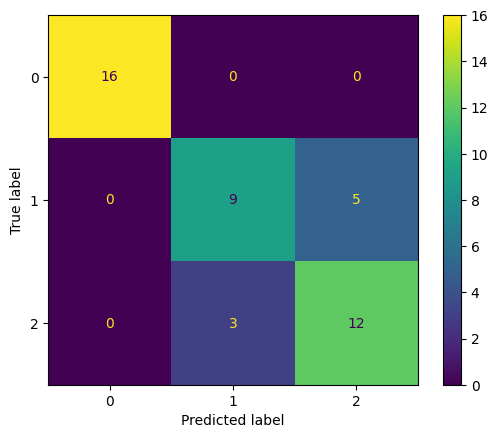

In [11]:
# Now do the same, but use only 2-dimensional data of original X (first two columns)
X_2d = X[:,:2]
X_train2d, X_test2d, y_train2d, y_test2d = train_test_split(X_2d, y, test_size=0.3)

knn2 = KNeighborsClassifier(n_neighbors=3)
knn2.fit(X_train2d, y_train2d)

Ypred2d = knn2.predict(X_test2d)

confusion_matrix(y_test2d, Ypred2d)
ConfusionMatrixDisplay.from_predictions(y_test2d, Ypred2d)